In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from moepy import lowess, eda

In [2]:
class ChiMayor:
    candidates = ['Kam Buckner', 'Chuy García', "Ja'Mal Green", 
        'Brandon Johnson', 'Sophia King', 'Lori Lightfoot', 
        'Raymond Lopez', 'Roderick Sawyer', 'Paul Vallas', 
        'Willie Wilson', 'Other', 'Undecided']
    # Colors based off wikipedia chart
    colors = ['#7b4a4a', '#ff9100', '#d8dc6a', 
        '#34d513', '#1fa3dd', '#ff00ff',
        '#20b2aa', '#4169e1', '#9370db', 
        '#ff0000', '#eeeeee', '#bfbfbf']
    
    def __init__(self, fp = 'wikipedia_polling_table.xlsx', frac = 1, x_end = 0) -> None:
        self.df = pd.read_excel(fp)
        electionday = np.datetime64('2023-02-28')
        self.df['date_delta'] = (self.df['StartDate']- electionday)  / np.timedelta64(1,'D')
        self.x = self.df['date_delta'].to_numpy()
        x_end = self.x.max() if x_end == -1 else x_end
        self.x_pred = np.linspace(self.x.min(), x_end, 14)
        self.model = lowess.Lowess()
        self.frac = frac


    def plot(self):
        for i, c in enumerate(self.candidates):
            y = self.df[c].to_numpy()

            self.model.fit(self.x, y, frac=self.frac)
            y_pred = self.model.predict(self.x_pred)

            c_color = self.colors[i]
            plt.scatter(self.x, y, color = c_color)
            plt.plot(self.x_pred, y_pred, '--', label = c, color = c_color)
        
        plt.title(label = 'Chicago Mayor Polling Projection')
        plt.legend(loc=(1.04, 0), title="Candidate")
        
        plt.xlabel('Days until election day (2/28/2023)')
        plt.ylabel('Polling Percentage')

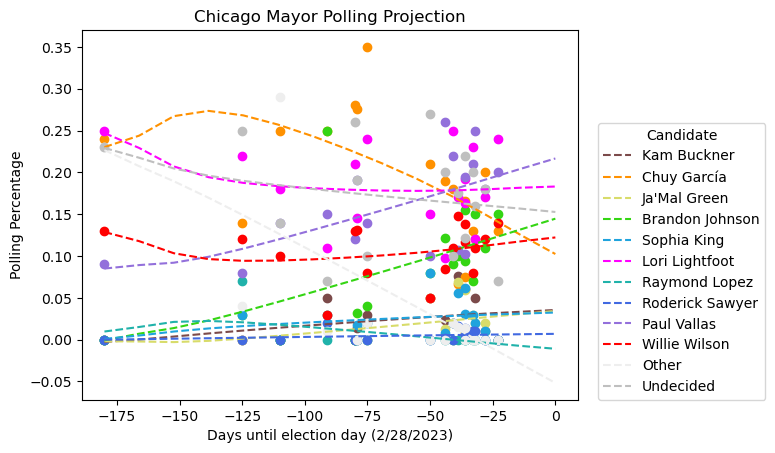

In [3]:
plot1 = ChiMayor()
p = plot1.plot()


C:\Users\micku\miniconda3\envs\main\lib\site-packages\moepy\lowess.py:185: RuntimeWarning: divide by zero encountered in divide
  cleaned_residuals = np.clip(residuals / (max_std_dev * std_dev), -1, 1)
C:\Users\micku\miniconda3\envs\main\lib\site-packages\moepy\lowess.py:185: RuntimeWarning: invalid value encountered in divide
  cleaned_residuals = np.clip(residuals / (max_std_dev * std_dev), -1, 1)


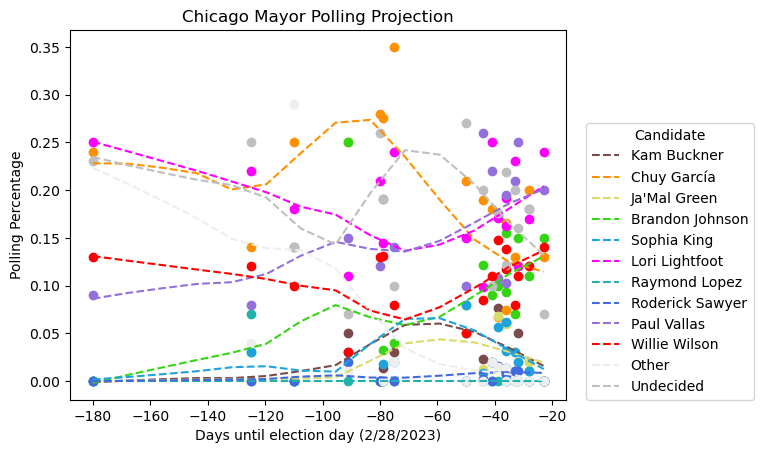

In [4]:
plot2 = ChiMayor(frac=0.5, x_end = -1)
plot2.plot()

C:\Users\micku\miniconda3\envs\main\lib\site-packages\moepy\lowess.py:185: RuntimeWarning: divide by zero encountered in divide
  cleaned_residuals = np.clip(residuals / (max_std_dev * std_dev), -1, 1)
C:\Users\micku\miniconda3\envs\main\lib\site-packages\moepy\lowess.py:185: RuntimeWarning: invalid value encountered in divide
  cleaned_residuals = np.clip(residuals / (max_std_dev * std_dev), -1, 1)


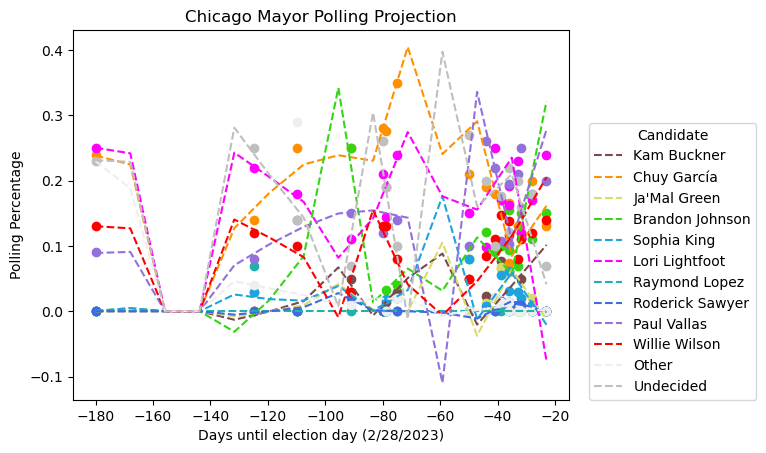

In [5]:
plot3 = ChiMayor(frac=0.2, x_end=-1)
plot3.plot()